# Quiz game on tv series

## descriptive analysis

In [125]:
import pandas as pd # type: ignore
import os # type: ignore
import opendatasets as od # type: ignore
import numpy as np # type: ignore
import random # type: ignore
import time # type: ignore
import matplotlib # type: ignore
from matplotlib import pyplot as plt # type: ignore
from collections import Counter # type: ignore
import geopandas as gpd # type: ignore

In [126]:
merge_set = pd.read_csv('./merge_set.csv')

In [161]:
merge_set.drop(['Unnamed: 0'], axis=1, inplace=True)

In [162]:
merge_set

,name_surname,birth,first_profession,second_profession,third_profession,type,title,adult,start_year,minutes_runtimes,genre_1,genre_2,genre_3
0,Fred Astaire,1899,actor,miscellaneous,producer,movie,The Towering Inferno,0,1974,165,Action,Drama,Thriller
1,Fred Astaire,1899,actor,miscellaneous,producer,movie,The Towering Inferno,0,1974,165,Action,Drama,Thriller
2,Fred Astaire,1899,actor,miscellaneous,producer,movie,The Towering Inferno,0,1974,165,Action,Drama,Thriller
3,Fred Astaire,1899,actor,miscellaneous,producer,movie,The Towering Inferno,0,1974,165,Action,Drama,Thriller
4,Fred Astaire,1899,actor,miscellaneous,producer,movie,The Towering Inferno,0,1974,165,Action,Drama,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650395,Pierre Thériault,1962,production manager,editorial_department,visual_effects,movie,The Fountain,0,2006,97,Drama,Mystery,Romance
3650396,Pierre Thériault,1962,production manager,editorial_department,visual_effects,movie,The Fountain,0,2006,97,Drama,Mystery,Romance
3650397,Pierre Thériault,1962,production manager,editorial_department,visual_effects,movie,The Fountain,0,2006,97,Drama,Mystery,Romance
3650398,Pierre Thériault,1962,production manager,editorial_department,visual_effects,movie,The Fountain,0,2006,97,Drama,Mystery,Romance


In [128]:
actors = merge_set.loc[(merge_set['first_profession'] == 'actor') | (merge_set['first_profession'] == 'actress')]

birth = actors['birth'].to_numpy()
round(np.mean(birth))

1944

In [129]:
minutes_runtimes = merge_set['minutes_runtimes'].to_numpy()

In [130]:
total_minutes = np.sum(minutes_runtimes)
total_hours = round(np.divide(total_minutes, 60))
total_days = round(np.divide(total_hours, 24))
total_years = round(np.divide(total_days, 365))

print(f'the total number of minuter are {total_minutes}')
print(f'the total number of hours are {total_hours}')
print(f'the total number of days are {total_days}')
print(f'the total number of years are {total_years}')

the total number of minuter are 381008989
the total number of hours are 6350150
the total number of days are 264590
the total number of years are 725


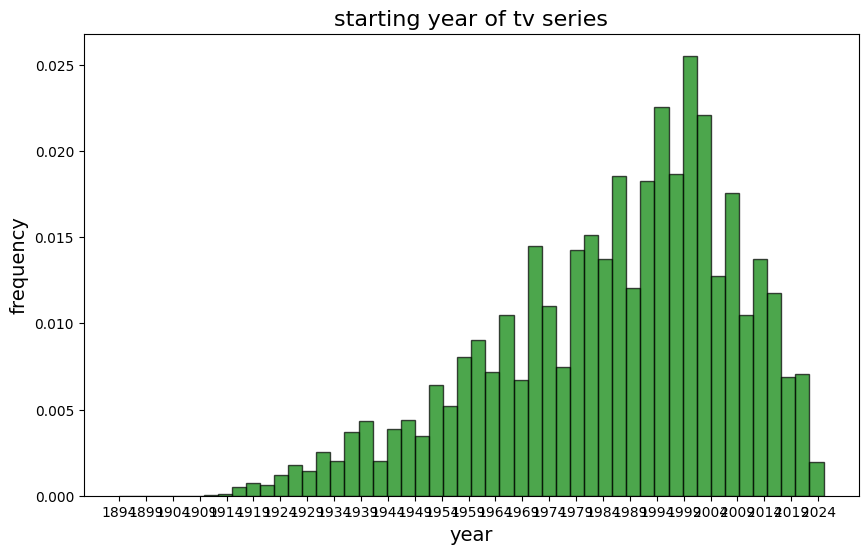

In [131]:
plt.figure(figsize=(10, 6))
plt.hist(merge_set['start_year'], bins=50, color='green', alpha=0.7, edgecolor='black', density=True)
plt.title('starting year of tv series/movies', fontsize=16)
plt.xlabel('year', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.xticks(np.arange(merge_set['start_year'].min(), merge_set['start_year'].max(), step=5))
plt.grid(False)
plt.show()

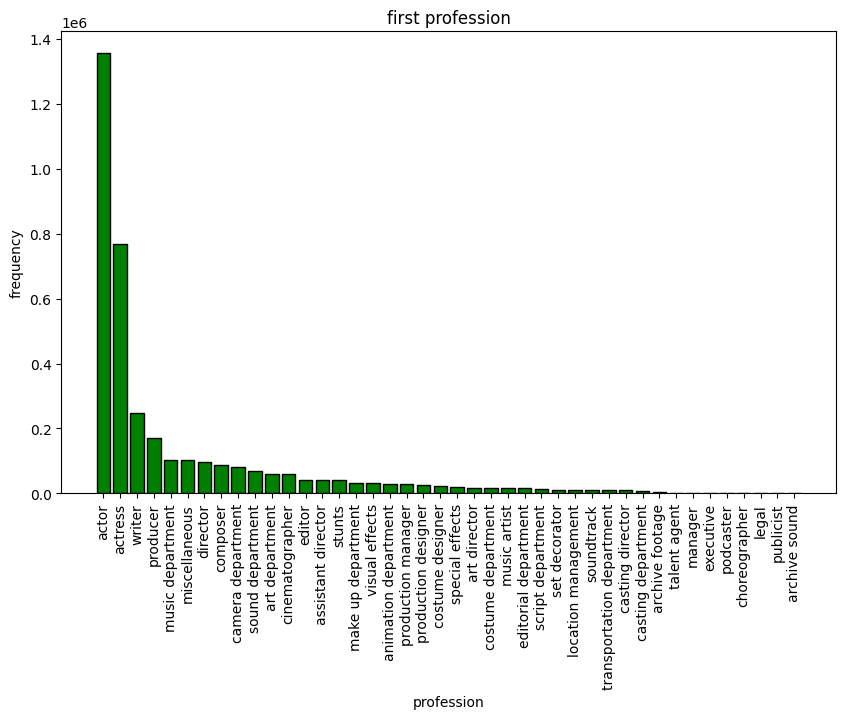

In [132]:
profession_counts = Counter(merge_set['first_profession'])

categories = list(profession_counts.keys())
frequencies = list(profession_counts.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='green', edgecolor='black')  
plt.title('first profession')
plt.xlabel('profession')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

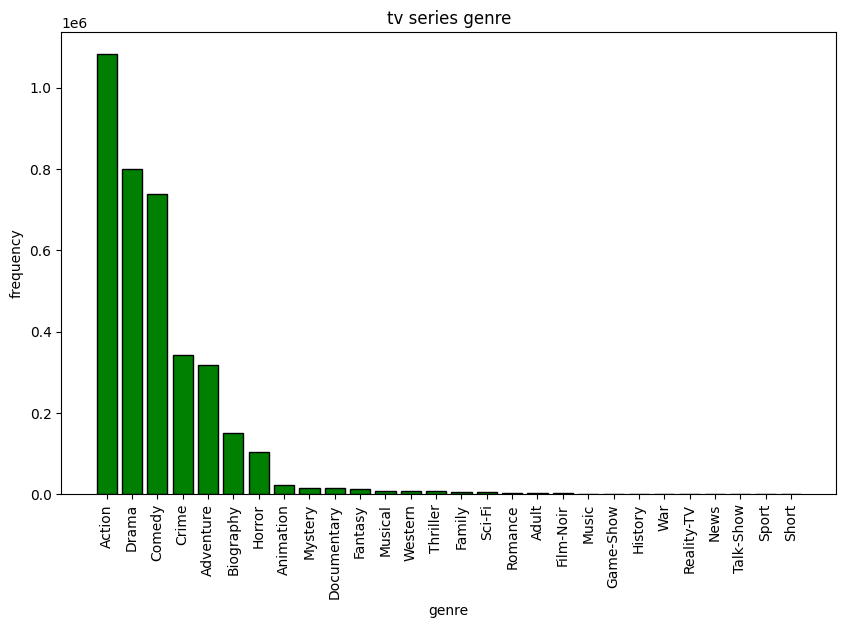

In [133]:
profession_counts = Counter(merge_set['genre_1'])

categories = list(profession_counts.keys())
frequencies = list(profession_counts.values())

sorted_indices = sorted(range(len(frequencies)), key=lambda i: frequencies[i], reverse=True)
sorted_categories = [categories[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_frequencies, color='green', edgecolor='black')  
plt.title('tv series/movies genre')
plt.xlabel('genre')
plt.ylabel('frequency')
plt.xticks(rotation=90)
plt.show()

In [134]:
counries_counts = Counter(merge_set['region'].dropna(how='any'))

df = pd.DataFrame({'country': list(counries_counts.keys()), 'frequency': list(counries_counts.values())})

In [135]:
df['country'].unique()

array(['US', 'AR', 'MX', 'PE', 'VE', 'AT', 'DE', 'XWG', 'CA', 'AU', 'FR',
       'CSHH', 'SK', 'PT', 'IR', 'DK', 'ES', 'NO', 'BR', 'RO', 'TR', 'IT',
       'EE', 'FI', 'LT', 'TH', 'GR', 'HR', 'PL', 'EC', 'HU', 'CZ', 'SE',
       'JP', 'KR', 'BE', 'BG', 'GB', 'SUHH', 'RS', 'UA', 'TW', 'IL', 'IN',
       'NL', 'PH', 'XYU', 'SI', 'CN', 'XWW', 'UY', 'ZA', 'HK', 'EG', 'VN',
       'LV', 'ID', 'AE', 'SG', 'DDDE', 'RU', 'CL', 'KZ', 'AZ', 'UZ', 'CH',
       'NZ', 'CO', 'PA', 'IE', 'CM', 'BY', 'XEU', 'GE', 'IS', 'YUCS',
       'BF', 'BJ', 'AL', 'XKO', 'QA', 'BD', 'GT', 'MK', 'CU', 'BA', 'MD',
       'LU', 'CR', 'DO', 'AM', 'XAS', 'TN', 'DZ', 'PR', 'JM', 'MY', 'NG',
       'PK', 'CG', 'SV', 'LB', 'BO', 'PY', 'TM', 'MZ', 'TJ', 'ME', 'MA',
       'XSA', 'KG', 'CI', 'AF', 'AW', 'MN', 'GL', 'LK', 'NP', 'SY', 'TO',
       'KP', 'LI', 'SN', 'SA', 'IQ', 'PS', 'KH', 'GH', 'KW', 'CY', 'XPI',
       'MC', 'HT', 'CSXX', 'ML', 'YE', 'GI', 'UG', 'ZW', 'SR', 'GN', 'MO',
       'BS', 'MR', 'BT', 'TD', 'ZM', 'G

In [136]:
world_data = gpd.read_file("map/ne_110m_admin_0_countries.shp")

In [137]:
world_data['ISO_A2_EH'].unique()

array(['FJ', 'TZ', 'EH', 'CA', 'US', 'KZ', 'UZ', 'PG', 'ID', 'AR', 'CL',
       'CD', 'SO', 'KE', 'SD', 'TD', 'HT', 'DO', 'RU', 'BS', 'FK', 'NO',
       'GL', 'TF', 'TL', 'ZA', 'LS', 'MX', 'UY', 'BR', 'BO', 'PE', 'CO',
       'PA', 'CR', 'NI', 'HN', 'SV', 'GT', 'BZ', 'VE', 'GY', 'SR', 'FR',
       'EC', 'PR', 'JM', 'CU', 'ZW', 'BW', 'NA', 'SN', 'ML', 'MR', 'BJ',
       'NE', 'NG', 'CM', 'TG', 'GH', 'CI', 'GN', 'GW', 'LR', 'SL', 'BF',
       'CF', 'CG', 'GA', 'GQ', 'ZM', 'MW', 'MZ', 'SZ', 'AO', 'BI', 'IL',
       'LB', 'MG', 'PS', 'GM', 'TN', 'DZ', 'JO', 'AE', 'QA', 'KW', 'IQ',
       'OM', 'VU', 'KH', 'TH', 'LA', 'MM', 'VN', 'KP', 'KR', 'MN', 'IN',
       'BD', 'BT', 'NP', 'PK', 'AF', 'TJ', 'KG', 'TM', 'IR', 'SY', 'AM',
       'SE', 'BY', 'UA', 'PL', 'AT', 'HU', 'MD', 'RO', 'LT', 'LV', 'EE',
       'DE', 'BG', 'GR', 'TR', 'AL', 'HR', 'CH', 'LU', 'BE', 'NL', 'PT',
       'ES', 'IE', 'NC', 'SB', 'NZ', 'AU', 'LK', 'CN', 'TW', 'IT', 'DK',
       'GB', 'IS', 'AZ', 'GE', 'PH', 'MY', 'BN', 'S

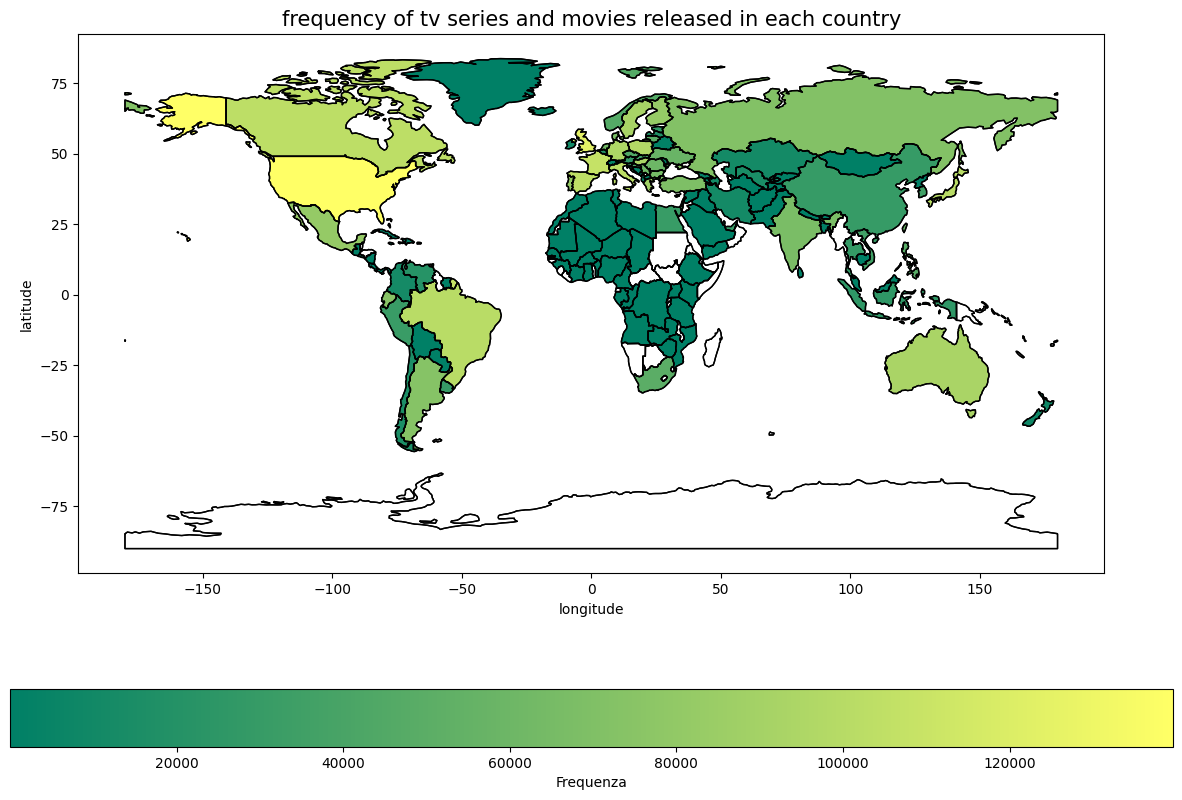

In [165]:
merged = world_data.set_index('ISO_A2_EH').join(df.set_index('country'), how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.boundary.plot(ax=ax, linewidth=1, color='black')  
merged.plot(column='frequency', ax=ax, legend=True,
            legend_kwds={'label': "Frequenza",
                         'orientation': "horizontal"},
            cmap='summer', edgecolor='black', missing_kwds={"color": "white"})

plt.title('frequency of tv series and movies released in each country', fontsize=15)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

## quiz

In [139]:
def difficulty(set):
    while True:
        dif = str(input('choose the difficulty between easy, medium and hard')).strip().lower()

        if dif not in ['hard', 'medium', 'easy']:
            print("please insert a proper difficulty between: 'hard' - 'medium' - 'easy'")
        else: 
            if dif == 'hard':
                set = set[(set['start_year'] <= 1966) & (~set['region'].isin(['US', 'CA']))]
                print('Rules: +1 if you are correct, -1 if incorrect.')
            elif dif == 'medium':
                set = set[(set['start_year'] >= 1967) & (set['start_year'] <= 1987) & (set['region'].isin(['US', 'CA']))]
                print('Rules: +1 if you are correct, -0.5 if incorrect.')
            elif dif == 'easy':
                set = set[(set['start_year'] >= 1988) & 
                          (set['region'].isin(['US', 'CA'])) & 
                          (set['first_profession'].isin(['actor', 'actress', 'writer', 'producer', 'director'])) &
                          (~set['genre_1'].isin(['Documentary', 'Talk-Show', 'Game-Show', 'Sci-Fi', 'News', 'History', 'Reality-TV', 'Short', 'Adult']))]
                print('Rules: +1 if you are correct, 0 otherwise.')
            
            return set, dif

In [140]:
def first_question(set):
    set = set.reset_index(drop=True)
    indices = random.choice(set.index) 
    title = set['title'].iloc[indices]
    region = set['region'].iloc[indices]
    name_surname = set['name_surname'].iloc[indices]
    role = set['first_profession'].iloc[indices]
        
    correct_answer = set['start_year'].iloc[indices]
    question = f"in which year was '{title}' made in {region} of {name_surname} as a {role} produced ?"
    
    return question, correct_answer    

In [141]:
def second_question(set):
    set = set.reset_index(drop=True)
    indices = random.choice(set.index) 
    title = set['title'].iloc[indices]
    region = set['region'].iloc[indices]
    name_surname = set['name_surname'].iloc[indices]
    role = set['first_profession'].iloc[indices]
        
    correct_answer = set['genre_1'].iloc[indices]
    question = f"what genre is '{title}' made in {region} of {name_surname} as a {role} ?"
    
    return question, correct_answer    

In [142]:
def third_question(set):
    set = set.reset_index(drop=True)
    indices = random.choice(set.index) 
    movie_type = set['type'].iloc[indices]
    name_surname = set['name_surname'].iloc[indices]
    role = set['first_profession'].iloc[indices]
    region = set['region'].iloc[indices]
        
    correct_answer = set['title'].iloc[indices]
    
    question = f"what was the title of the {movie_type} made in {region} with {name_surname} as a {role} ?"
    
    return question, correct_answer    

In [143]:
def fourth_question(set):
    set = set.reset_index(drop=True)
    indices = random.choice(set.index) 
    movie_type = set['type'].iloc[indices]
    title = set['title'].iloc[indices]
    role = set['first_profession'].iloc[indices]
        
    correct_answer = set['name_surname'].iloc[indices]
    
    question = f"who was the {role} of the {movie_type} named '{title}' ?"
    
    return question, correct_answer    

In [144]:
def score_fun(score, my_answer, correct_answer, dif):

    if my_answer == correct_answer:
        score += 1
        print(f'your answer was {my_answer} and the correct one is {correct_answer}')
        print(f'your current score is: {score}')
    else:
        print(f'your answer was {my_answer} but the correct one is {correct_answer}')
        if dif == 'hard':
            score -= 1
        elif dif == 'medium':
            score -= 0.5

        if score < 0:
            score = 0
        print(f'your current score is: {score}')

    return score

In [145]:
def gen_answers(correct_answer):
    if correct_answer in merge_set['start_year'].values:
        incorrect_ans = [correct_answer - random.choice([2,4,6,8]), 
                         correct_answer - random.choice([1,3,5,7,9]), 
                         correct_answer - random.choice([10,15,20,25,30])]
        options = [correct_answer] + incorrect_ans
        random.shuffle(options)
        return options
    elif correct_answer in merge_set['genre_1'].values:
        incorrect_ans = random.sample(list(merge_set['genre_1'].unique()), 3)
        if correct_answer in incorrect_ans:
            while correct_answer in incorrect_ans:
                incorrect_ans = random.sample(list(merge_set['genre_1'].unique()), 3)

        options = [correct_answer] + incorrect_ans
        random.shuffle(options)
        return options
    elif correct_answer in merge_set['title'].values:
        incorrect_ans = random.sample(list(merge_set['title'].unique()), 3)
        if correct_answer in incorrect_ans:
            while correct_answer in incorrect_ans:
                incorrect_ans = random.sample(list(merge_set['title'].unique()), 3)

        options = [correct_answer] + incorrect_ans
        random.shuffle(options)
        return options
    elif correct_answer in merge_set['name_surname'].values:
        incorrect_ans = random.sample(list(merge_set['name_surname'].unique()), 3)
        if correct_answer in incorrect_ans:
            while correct_answer in incorrect_ans:
                incorrect_ans = random.sample(list(merge_set['name_surname'].unique()), 3)

        options = [correct_answer] + incorrect_ans
        random.shuffle(options)
        return options

In [146]:
letters = ['A', 'B', 'C', 'D']

def ask_question(question, correct_answer, choices):

    print(question)
    for j, choice in zip(letters, choices):
        print(f"{j}. {choice}")

    while True:  
        my_answer = input('Enter your answer (A, B, C, or D): ').upper()  
        if my_answer in letters:  
            break
        print("Invalid input. Please enter A, B, C, or D.")

    chosen_index = letters.index(my_answer)
    chosen_answer = choices[chosen_index]

    return chosen_answer, correct_answer  

In [147]:
def rounds():
    while True:
        try: 
            n_round = int(input('how many rounds do you want to play? '))
            if n_round > 0:
                return n_round
            else:
                print('please enter a positive number of rounds')
        except ValueError:
            print('please enter a positive number of rounds')

In [148]:
def quiz(set):
    print('welcome! please enter the difficulty and how many rounds do you want to play')
    score = 0

    while True:
            set, dif = difficulty(set)
            n_round = rounds()
            print(f'you are goin to play for {n_round} rounds at {dif} level')
            start_time = time.time()
            question_funcs = [first_question, second_question, third_question, fourth_question]

            for round_number in range(n_round):
                    print('-------------------------------------------')
                    print(f'Round {round_number + 1}')
                    
                    question_func = question_funcs[round_number % len(question_funcs)]
                    question, correct_answer = question_func(set)
                    choices = gen_answers(correct_answer)
                    chosen_answer, correct_answer = ask_question(question, correct_answer, choices)
                    score = score_fun(score, chosen_answer, correct_answer, dif)
        
            end_time = time.time()
            time_involved = end_time - start_time
            print('-------------------------------------------')
            print(f"It took you {time_involved:.2f} seconds to solve the quiz.")
            if score/n_round > 0.6:
                print(f'good job! your final score is {score}/{n_round}') 
            else:
                print(f'you can do better! your final score is {score}/{n_round}')
            
            play_again = str(input("thank you for playing, would you like to play again ? enter 'yes' or 'no'"))
            if play_again == 'no':
                print("you are exiting the game, thank you for playing!")
                break
            elif play_again == 'yes':
                score = 0
                set = pd.read_csv('./merge_set.csv')
                print('-------------------------------------------')
            else:
                print("you are exiting the game, thank you for playing!")
                break

In [149]:
# quiz(merge_set)

In [150]:
# from quiz import QuizGame

In [151]:
# game = QuizGame(merge_set)
# game.quiz()